In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('../Pima_dataset/pima_impute.csv')

In [ ]:
X = data.drop(["Outcome"], axis=1)
y = data["Outcome"]

## Feature Selection/Reduction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
scaler = StandardScaler()
MinMaxScaler = MinMaxScaler()
lr = LogisticRegression(max_iter=10000, tol=0.01)

### Select K Best

In [ ]:
selectK = SelectKBest(chi2)

In [ ]:
pipe = Pipeline(steps=[("MinMaxScaler", MinMaxScaler), ("selectK", selectK), ("lr", lr)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "selectK__k": range(1, X.shape[1]+1),
    "lr__C": np.logspace(-4, 4, 20),
}
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print("Test accuracy:%0.3f" % search.score(X_test, y_test))

Best parameter (CV score=0.778):
{'lr__C': 11.288378916846883, 'selectK__k': 7}
Test accuracy:0.744


In [ ]:
selectK = SelectKBest(chi2, k=search.best_params_['selectK__k'])
preprocess_selectK = Pipeline(steps=[("MinMaxScaler", MinMaxScaler), ("selectK", selectK)])

In [ ]:
train_scores = []
test_scores = []

for n in range(1, X.shape[1]+1):
    selectK = SelectKBest(chi2, k=n)
    pipe = Pipeline(steps=[("MinMaxScaler", MinMaxScaler), ("selectK", selectK), ("lr", lr)])
    param_grid = {
    "lr__C": np.logspace(-4, 4, 20),
    }
    search = GridSearchCV(pipe, param_grid, n_jobs=2)
    search.fit(X_train, y_train)
    train_scores.append(search.best_score_)
    test_scores.append(search.score(X_test, y_test))
    print("Select %d best" % n)
    print("Best parameter (CV score=%0.3f):" % search.best_score_)
    print(search.best_params_)

Select 1 best
Best parameter (CV score=0.759):
{'lr__C': 1.623776739188721}
Select 2 best
Best parameter (CV score=0.751):
{'lr__C': 0.615848211066026}
Select 3 best
Best parameter (CV score=0.755):
{'lr__C': 0.615848211066026}
Select 4 best
Best parameter (CV score=0.768):
{'lr__C': 0.615848211066026}
Select 5 best
Best parameter (CV score=0.776):
{'lr__C': 11.288378916846883}
Select 6 best
Best parameter (CV score=0.778):
{'lr__C': 29.763514416313132}
Select 7 best
Best parameter (CV score=0.778):
{'lr__C': 11.288378916846883}
Select 8 best
Best parameter (CV score=0.772):
{'lr__C': 4.281332398719396}


Text(0.5, 0, 'Select k Best')

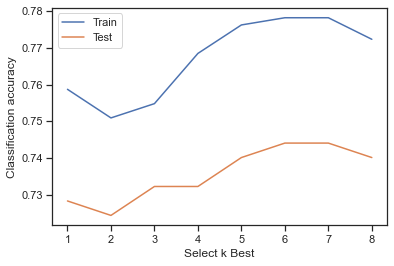

In [ ]:
plt.plot(figsize=(3, 6))

plt.plot(np.arange(1, X.shape[1] + 1), train_scores, label='Train')
plt.plot(np.arange(1, X.shape[1] + 1), test_scores, label='Test')
plt.ylabel("Classification accuracy")
plt.legend()

plt.xlabel("Select k Best")

### PCA

In [ ]:
pca = PCA()

In [ ]:
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("lr", lr)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "pca__n_components": range(1, X.shape[1]+1),
    "lr__C": np.logspace(-4, 4, 20),
}
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print("Test accuracy:%0.3f" % search.score(X_test, y_test))

Best parameter (CV score=0.776):
{'lr__C': 0.23357214690901212, 'pca__n_components': 8}
Test accuracy:0.744


In [ ]:
pca = PCA(n_components=search.best_params_["pca__n_components"])
lr = LogisticRegression(max_iter=10000, tol=0.1, C=search.best_params_["lr__C"])

pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("lr", lr)])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7440944881889764

In [ ]:
pca = PCA(n_components=search.best_params_["pca__n_components"])
preprocess_pca = Pipeline(steps=[("scaler", scaler), ("pca", pca)])

In [ ]:
train_scores = []
test_scores = []

for n in range(1, X.shape[1]+1):
    pca = PCA(n_components=n)
    pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("lr", lr)])
    param_grid = {
    "lr__C": np.logspace(-4, 4, 20),
    }
    search = GridSearchCV(pipe, param_grid, n_jobs=2)
    search.fit(X_train, y_train)
    train_scores.append(search.best_score_)
    test_scores.append(search.score(X_test, y_test))
    print("PCA: n =" + str(n))
    print("Best parameter (CV score=%0.3f):" % search.best_score_)
    print(search.best_params_)

PCA: n =1
Best parameter (CV score=0.761):
{'lr__C': 0.012742749857031334}
PCA: n =2
Best parameter (CV score=0.763):
{'lr__C': 0.012742749857031334}
PCA: n =3
Best parameter (CV score=0.763):
{'lr__C': 0.23357214690901212}
PCA: n =4
Best parameter (CV score=0.765):
{'lr__C': 0.615848211066026}
PCA: n =5
Best parameter (CV score=0.759):
{'lr__C': 0.012742749857031334}
PCA: n =6
Best parameter (CV score=0.768):
{'lr__C': 0.08858667904100823}
PCA: n =7
Best parameter (CV score=0.766):
{'lr__C': 0.03359818286283781}
PCA: n =8
Best parameter (CV score=0.776):
{'lr__C': 0.23357214690901212}


In [ ]:
pca = PCA(n_components=8)
pca.fit(X_train)

PCA(n_components=8)

Text(0.5, 0, 'n_components')

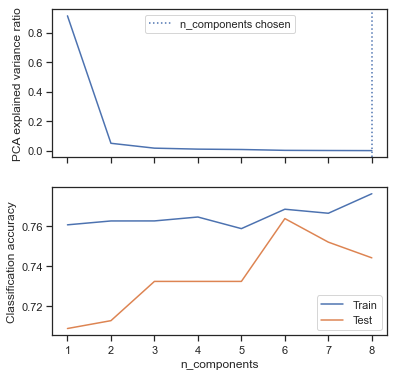

In [ ]:
# Plot the PCA spectrum

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components + 1), pca.explained_variance_ratio_)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
ax0.legend()

ax1.plot(np.arange(1, pca.n_components + 1), train_scores, label='Train')
ax1.plot(np.arange(1, pca.n_components + 1), test_scores, label='Test')
ax1.set_ylabel("Classification accuracy")
ax1.legend()

ax1.set_xlabel("n_components")

### KMeans Reduction (X)
https://mclguide.readthedocs.io/en/latest/sklearn/clusterdim.html

## Modeling

* https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_kernel_approximation.html#sphx-glr-auto-examples-miscellaneous-plot-kernel-approximation-py
* https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html

In [ ]:
preprocess_pca

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=8))])

In [ ]:
preprocess_selectK

Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),
                ('selectK',
                 SelectKBest(k=7,
                             score_func=<function chi2 at 0x7fdbdb808040>))])

### SVM

In [ ]:
from sklearn import svm

svm = svm.SVC()

In [ ]:
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "C": np.logspace(0, 4, 20),
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid']
}
search = GridSearchCV(svm, param_grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print("Test accuracy:%0.3f" % search.score(X_test, y_test))

Best parameter (CV score=0.780):
{'C': 885.8667904100823, 'kernel': 'rbf'}
Test accuracy:0.732


In [ ]:
pca_svm_pipe = Pipeline(steps=[("preprocess_pca", preprocess_pca), ("svm", svm)])
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "svm__C": np.logspace(0, 4, 20),
    "svm__kernel": ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
}
search = GridSearchCV(pca_svm_pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print("Test accuracy:%0.3f" % search.score(X_test, y_test))

Best parameter (CV score=0.776):
{'svm__C': 1.6237767391887217, 'svm__kernel': 'rbf'}
Test accuracy:0.728


In [ ]:
selectK_svm_pipe = Pipeline(steps=[("preprocess_selectK", preprocess_selectK), ("svm", svm)])
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "svm__C": np.logspace(0, 4, 20),
    "svm__kernel": ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
}
search = GridSearchCV(pca_svm_pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print("Test accuracy:%0.3f" % search.score(X_test, y_test))

Best parameter (CV score=0.776):
{'svm__C': 1.6237767391887217, 'svm__kernel': 'rbf'}
Test accuracy:0.728


### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(random_state=42)

In [ ]:
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "n_estimators": range(0, 81, 2)
}
search = GridSearchCV(adb, param_grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print("Test accuracy:%0.3f" % search.score(X_test, y_test))

Best parameter (CV score=0.759):
{'n_estimators': 28}
Test accuracy:0.752


In [ ]:
pca_adb_pipe = Pipeline(steps=[("preprocess_pca", preprocess_pca), ("adb", adb)])

param_grid = {
    "adb__n_estimators": range(0, 81, 2),
}
search = GridSearchCV(pca_adb_pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print("Test accuracy:%0.3f" % search.score(X_test, y_test))

Best parameter (CV score=0.747):
{'adb__n_estimators': 52}
Test accuracy:0.736


In [ ]:
selectK_adb_pipe = Pipeline(steps=[("preprocess_selectK", preprocess_selectK), ("adb", adb)])

param_grid = {
    "adb__n_estimators": range(0, 81, 2),
}
search = GridSearchCV(selectK_adb_pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print("Test accuracy:%0.3f" % search.score(X_test, y_test))

Best parameter (CV score=0.761):
{'adb__n_estimators': 30}
Test accuracy:0.752


### Decision Tree (X)

https://www.datacamp.com/community/tutorials/decision-tree-classification-python

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(random_state=42)

In [ ]:
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "n_estimators": range(0, 81, 2)
}
search = GridSearchCV(adb, param_grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print("Test accuracy:%0.3f" % search.score(X_test, y_test))

Best parameter (CV score=0.759):
{'n_estimators': 28}
Test accuracy:0.752


In [ ]:
pca_adb_pipe = Pipeline(steps=[("preprocess_pca", preprocess_pca), ("adb", adb)])

param_grid = {
    "adb__n_estimators": range(0, 81, 2),
}
search = GridSearchCV(pca_adb_pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print("Test accuracy:%0.3f" % search.score(X_test, y_test))

Best parameter (CV score=0.747):
{'adb__n_estimators': 52}
Test accuracy:0.736


In [ ]:
selectK_adb_pipe = Pipeline(steps=[("preprocess_selectK", preprocess_selectK), ("adb", adb)])

param_grid = {
    "adb__n_estimators": range(0, 81, 2),
}
search = GridSearchCV(selectK_adb_pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print("Test accuracy:%0.3f" % search.score(X_test, y_test))

Best parameter (CV score=0.761):
{'adb__n_estimators': 30}
Test accuracy:0.752


-----------------------------------------------------------------------------------------------------------------------------------------------------------------

### Evaluation

https://towardsdatascience.com/performance-metrics-confusion-matrix-precision-recall-and-f1-score-a8fe076a2262

https://towardsdatascience.com/understanding-confusion-matrix-precision-recall-and-f1-score-8061c9270011

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=target_names))